In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
import requests
from datetime import datetime
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 69.96,
  'feels_like': 69.24,
  'temp_min': 66.45,
  'temp_max': 73.15,
  'pressure': 1010,
  'humidity': 55},
 'visibility': 10000,
 'wind': {'speed': 10, 'deg': 321, 'gust': 20},
 'clouds': {'all': 40},
 'dt': 1634922682,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1634900725,
  'sunset': 1634939496},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | saint-paul
Processing Record 3 of Set 1 | buqayq
City not found. Skipping...
Processing Record 4 of Set 1 | jequitinhonha
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kirakira
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | ternate
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | ksenyevka
City not found. Skipping...
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | tomari
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | ayagoz
Processing Record 20 of Set 1 | qasigiannguit
Processing Record 21 of Set 1 | dikson
Processing Recor

Processing Record 34 of Set 4 | monrovia
Processing Record 35 of Set 4 | clyde river
Processing Record 36 of Set 4 | kysyl-syr
Processing Record 37 of Set 4 | port alfred
Processing Record 38 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 4 | praia
Processing Record 40 of Set 4 | tommot
Processing Record 41 of Set 4 | la ronge
Processing Record 42 of Set 4 | paita
Processing Record 43 of Set 4 | victor harbor
Processing Record 44 of Set 4 | dauphin
Processing Record 45 of Set 4 | turbat
Processing Record 46 of Set 4 | terrace
Processing Record 47 of Set 4 | cap-chat
Processing Record 48 of Set 4 | ozark
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | catamarca
Processing Record 1 of Set 5 | manicore
Processing Record 2 of Set 5 | valandovo
Processing Record 3 of Set 5 | bambous virieux
Processing Record 4 of Set 5 | ploemeur
Processing Record 5 of Set 5 | barrow
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | breves


Processing Record 25 of Set 8 | alofi
Processing Record 26 of Set 8 | dudinka
Processing Record 27 of Set 8 | geraldton
Processing Record 28 of Set 8 | amapa
Processing Record 29 of Set 8 | tocopilla
Processing Record 30 of Set 8 | conde
Processing Record 31 of Set 8 | marau
Processing Record 32 of Set 8 | balakhta
Processing Record 33 of Set 8 | dole
Processing Record 34 of Set 8 | haines junction
Processing Record 35 of Set 8 | soldato-aleksandrovskoye
Processing Record 36 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 37 of Set 8 | aykhal
Processing Record 38 of Set 8 | huarmey
Processing Record 39 of Set 8 | kaeo
Processing Record 40 of Set 8 | sola
Processing Record 41 of Set 8 | olafsvik
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | akyab
Processing Record 44 of Set 8 | teguise
Processing Record 45 of Set 8 | canutama
Processing Record 46 of Set 8 | dickinson
Processing Record 47 of Set 8 | tuatapere
Processing Record 48 of Set 8 | vyso

Processing Record 12 of Set 12 | rawlins
Processing Record 13 of Set 12 | martapura
Processing Record 14 of Set 12 | pascagoula
Processing Record 15 of Set 12 | odessa
Processing Record 16 of Set 12 | guerrero negro
Processing Record 17 of Set 12 | staryy nadym
Processing Record 18 of Set 12 | goderich
Processing Record 19 of Set 12 | guilin
Processing Record 20 of Set 12 | saurimo
Processing Record 21 of Set 12 | iskateley
Processing Record 22 of Set 12 | pandan
Processing Record 23 of Set 12 | vao
Processing Record 24 of Set 12 | cabedelo
Processing Record 25 of Set 12 | arkhangelos
City not found. Skipping...
Processing Record 26 of Set 12 | gananoque
Processing Record 27 of Set 12 | harper
Processing Record 28 of Set 12 | riyadh
Processing Record 29 of Set 12 | marfino
Processing Record 30 of Set 12 | asyut
Processing Record 31 of Set 12 | cascais
Processing Record 32 of Set 12 | rybnaya sloboda
Processing Record 33 of Set 12 | businga
Processing Record 34 of Set 12 | pontian kecil

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,48.00,82,96,3.67,NZ,2021-10-22 17:16:05
1,Saint-Paul,-21.0096,55.2707,77.11,94,11,1.01,RE,2021-10-22 17:16:06
2,Jequitinhonha,-16.4339,-41.0033,80.82,67,98,1.90,BR,2021-10-22 17:16:06
3,Punta Arenas,-53.1500,-70.9167,50.11,53,75,47.18,CL,2021-10-22 17:16:07
4,Kirakira,-10.4544,161.9205,78.31,78,82,7.58,SB,2021-10-22 17:16:07
5,Atuona,-9.8000,-139.0333,77.54,79,28,21.16,PF,2021-10-22 17:16:08
6,Kodiak,57.7900,-152.4072,42.31,61,90,17.27,US,2021-10-22 17:16:08
7,Ternate,0.8000,127.4000,80.71,79,99,3.89,ID,2021-10-22 17:16:08
8,Busselton,-33.6500,115.3333,49.08,73,7,7.78,AU,2021-10-22 17:16:09
9,Vestmannaeyjar,63.4427,-20.2734,43.79,93,90,29.93,IS,2021-10-22 17:16:09


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-10-22 17:16:05,-46.6000,168.3333,48.00,82,96,3.67
1,Saint-Paul,RE,2021-10-22 17:16:06,-21.0096,55.2707,77.11,94,11,1.01
2,Jequitinhonha,BR,2021-10-22 17:16:06,-16.4339,-41.0033,80.82,67,98,1.90
3,Punta Arenas,CL,2021-10-22 17:16:07,-53.1500,-70.9167,50.11,53,75,47.18
4,Kirakira,SB,2021-10-22 17:16:07,-10.4544,161.9205,78.31,78,82,7.58
5,Atuona,PF,2021-10-22 17:16:08,-9.8000,-139.0333,77.54,79,28,21.16
6,Kodiak,US,2021-10-22 17:16:08,57.7900,-152.4072,42.31,61,90,17.27
7,Ternate,ID,2021-10-22 17:16:08,0.8000,127.4000,80.71,79,99,3.89
8,Busselton,AU,2021-10-22 17:16:09,-33.6500,115.3333,49.08,73,7,7.78
9,Vestmannaeyjar,IS,2021-10-22 17:16:09,63.4427,-20.2734,43.79,93,90,29.93


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-10-22 17:16:05,-46.6000,168.3333,48.00,82,96,3.67
1,Saint-Paul,RE,2021-10-22 17:16:06,-21.0096,55.2707,77.11,94,11,1.01
2,Jequitinhonha,BR,2021-10-22 17:16:06,-16.4339,-41.0033,80.82,67,98,1.90
3,Punta Arenas,CL,2021-10-22 17:16:07,-53.1500,-70.9167,50.11,53,75,47.18
4,Kirakira,SB,2021-10-22 17:16:07,-10.4544,161.9205,78.31,78,82,7.58
...,...,...,...,...,...,...,...,...,...
566,Pafos,CY,2021-10-22 17:20:24,34.7667,32.4167,75.11,64,20,6.91
567,Villafranca De Los Barros,ES,2021-10-22 17:20:24,38.5614,-6.3381,70.52,42,0,10.07
568,Najran,SA,2021-10-22 17:20:25,17.4924,44.1277,79.45,25,15,8.93
569,San Patricio,US,2021-10-22 17:20:25,28.0170,-97.5169,86.05,57,89,4.63


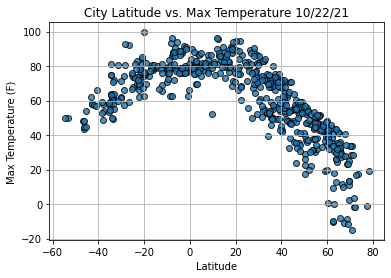

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

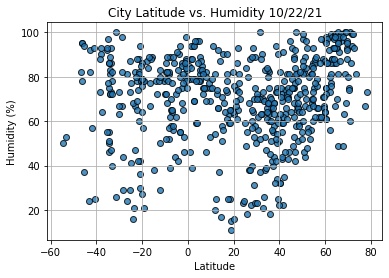

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

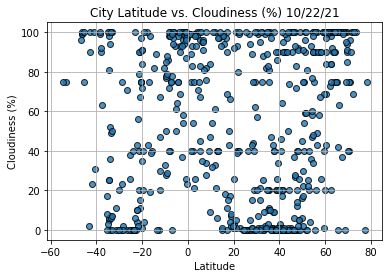

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

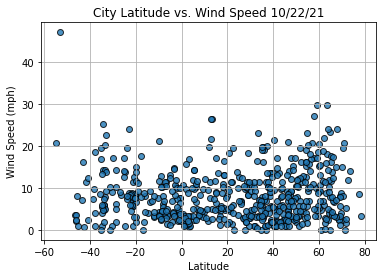

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()